# Exploratory Data Analysis - Tic Tac Toe
**Author**: Gabriela Dellamora Paim, Bruno Duarte Carlan

**Version**: 14/04/2025

**Python Ver**: 3.12.9

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
# Importar libs de visualização.

PATH = './data.csv'
X_WIN   = X = '1'
O_WIN   = O ='-1'
DRAW    = '0'
ONGOING = '0.5'

c:\Users\Marnie\anaconda3\envs\AI-TicTacToe\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Estatísticas descritivas das colunas (somente para numéricos, target no caso)
df = pd.read_csv(PATH)
df.describe()

,0,1,2,3,4,5,6,7,8,category
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,-0.004550,0.014156,-0.000506,0.000000,-0.004044,-0.004550,0.005056,0.005056,0.009606,0.016178
std,0.882861,0.860416,0.878277,0.855817,0.908001,0.856691,0.881998,0.858163,0.878225,0.979683
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# Como nosso dataset é "ordenado",
# capturar um sample é mais interessante, já que o sample apresenta n observações aleatórias do dataset
print("\nSample do dataset:")
df.sample(30)


Sample do dataset:


,0,1,2,3,4,5,6,7,8,category
597,0,0,1,-1,-1,1,-1,1,1,1.0
1864,0,-1,0,-1,-1,0,1,1,1,1.0
324,-1,1,-1,1,1,-1,0,1,0,1.0
1803,1,1,0,-1,1,-1,-1,-1,1,1.0
336,-1,1,-1,0,1,1,0,1,-1,1.0
184,1,-1,-1,0,-1,0,1,1,1,1.0
1945,0,1,0,1,1,-1,0,-1,0,0.5
898,0,1,-1,1,-1,0,-1,0,1,-1.0
110,1,1,0,0,1,-1,-1,1,-1,1.0
1032,-1,-1,-1,0,0,0,1,0,1,-1.0


In [4]:
# Verificar o tamanho do dataset
print("\nDimensões do dataset:")
print(df.shape)


Dimensões do dataset:
(1978, 10)


In [5]:
# Verificar valores únicos por coluna
print("\nValores únicos por coluna:")
for col in df.columns:
    print(f"\nColuna '{col}':")
    print(df[col].value_counts())


Valores únicos por coluna:

Coluna '0':
0
-1    775
 1    766
 0    437
Name: count, dtype: int64

Coluna '1':
1
 1    746
-1    718
 0    514
Name: count, dtype: int64

Coluna '2':
2
-1    763
 1    762
 0    453
Name: count, dtype: int64

Coluna '3':
3
 1    724
-1    724
 0    530
Name: count, dtype: int64

Coluna '4':
4
-1    819
 1    811
 0    348
Name: count, dtype: int64

Coluna '5':
5
-1    730
 1    721
 0    527
Name: count, dtype: int64

Coluna '6':
6
 1    774
-1    764
 0    440
Name: count, dtype: int64

Coluna '7':
7
 1    733
-1    723
 0    522
Name: count, dtype: int64

Coluna '8':
8
 1    772
-1    753
 0    453
Name: count, dtype: int64

Coluna 'category':
category
 1.0    941
-1.0    941
 0.5     64
 0.0     32
Name: count, dtype: int64


In [6]:
# Análise da variável alvo
print("\nDistribuição da variável alvo (category):")
print(df['category'].value_counts(normalize=True))


Distribuição da variável alvo (category):
category
 1.0    0.475733
-1.0    0.475733
 0.5    0.032356
 0.0    0.016178
Name: proportion, dtype: float64


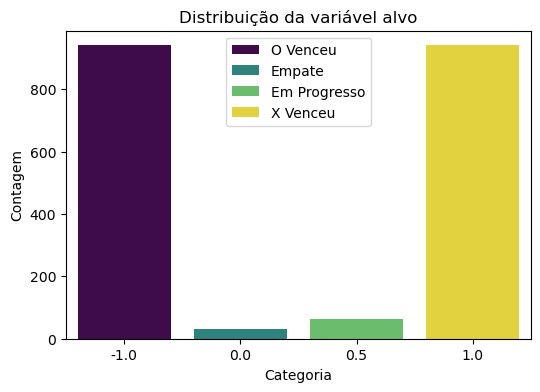

In [7]:
# Visualização da distribuição da variável alvo
plt.figure(figsize=(6, 4))
sns.countplot(x='category', data=df, palette='viridis', hue='category')
plt.title('Distribuição da variável alvo')
plt.legend(['O Venceu', 'Empate', 'Em Progresso', 'X Venceu'])
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

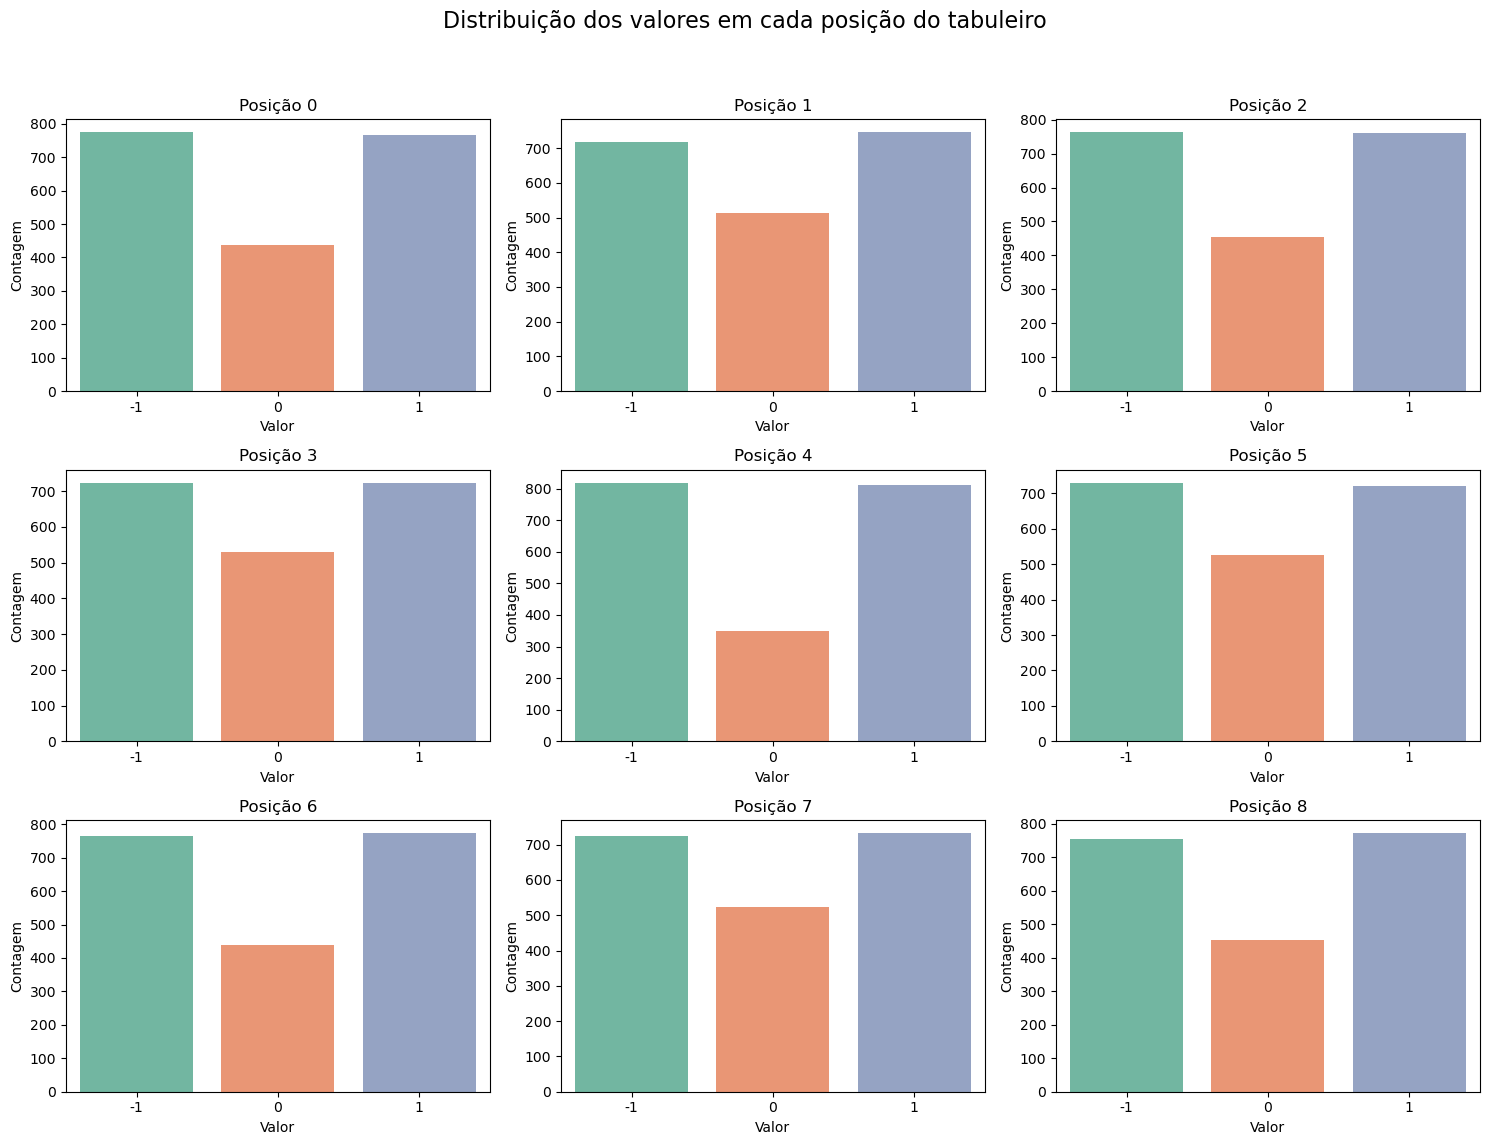

In [8]:
# Visualizar distribuições dos valores em cada coluna do tabuleiro (corrigido)
cols = df.columns[:-1]  # Excluir a coluna 'category'
num_cols = len(cols)

# Calcular número de linhas e colunas para o subplot dinamicamente
n_cols = 3
n_rows = (num_cols + n_cols - 1) // n_cols  # Arredondar para cima

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
fig.suptitle('Distribuição dos valores em cada posição do tabuleiro', fontsize=16)

# Se axes for 1D, transformar em 2D para evitar erros
if n_rows == 1:
    axes = [axes]
axes = axes.flatten()

# Plotar cada coluna
for i, col in enumerate(cols):
    sns.countplot(x=col, hue=col, data=df, ax=axes[i], palette='Set2', legend=False)
    axes[i].set_title(f'Posição {col}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Contagem')

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
# Análise cruzada: posição 0 x category
print("\nCruzamento entre a posição 0 e a variável category:")
cross_tab = pd.crosstab(df['0'], df['category'])
print(cross_tab)


Cruzamento entre a posição 0 e a variável category:
category  -1.0   0.0   0.5   1.0
0                               
-1         433    16    23   303
 0         205     0    27   205
 1         303    16    14   433


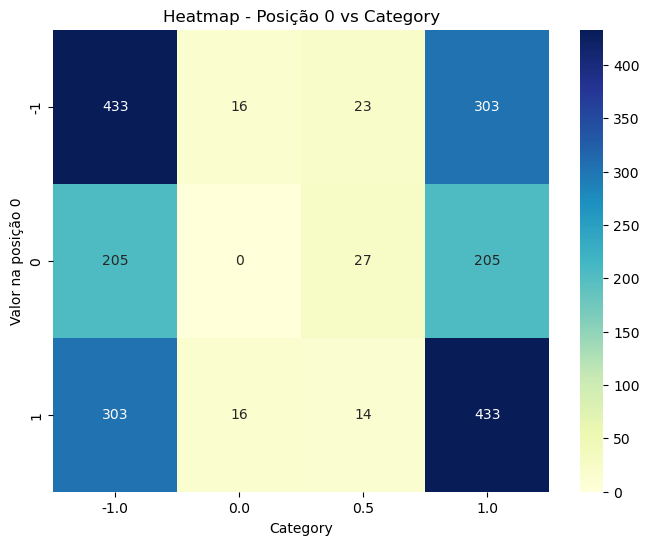

In [10]:
# Heatmap para visualizar a correlação entre posições e categoria
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap - Posição 0 vs Category')
plt.ylabel('Valor na posição 0')
plt.xlabel('Category')
plt.show()

In [11]:
pf = ProfileReport(df)
pf.to_file('report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 199.96it/s]
